In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'SOX'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,2983.389893,3031.909912,2892.219971,3028.340088,0,0.0,0.0
2023-03-06 00:00:00-05:00,3036.580078,3083.679932,2909.520020,2923.929932,0,0.0,0.0
2023-03-13 00:00:00-04:00,2883.879883,3127.419922,2861.449951,3083.520020,0,0.0,0.0
2023-03-20 00:00:00-04:00,3083.939941,3216.320068,3060.340088,3121.260010,0,0.0,0.0
2023-03-27 00:00:00-04:00,3129.399902,3233.939941,3015.800049,3230.860107,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5007.839844,5161.930176,4776.819824,5015.850098,0,0.0,0.0
2025-02-03 00:00:00-05:00,4866.450195,5129.640137,4848.720215,5009.339844,0,0.0,0.0
2025-02-10 00:00:00-05:00,5058.000000,5176.330078,4992.520020,5160.939941,0,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-24 00:00:00-05:00,1692.599976,1731.020020,1605.939941,1705.540039,0,0.0,0.0
2020-03-02 00:00:00-05:00,1727.609985,1797.010010,1657.670044,1699.890015,0,0.0,0.0
2020-03-09 00:00:00-04:00,1560.739990,1656.869995,1388.989990,1544.260010,0,0.0,0.0
2020-03-16 00:00:00-04:00,1433.569946,1446.800049,1233.969971,1298.540039,0,0.0,0.0
2020-03-23 00:00:00-04:00,1315.199951,1574.619995,1280.750000,1488.750000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5007.839844,5161.930176,4776.819824,5015.850098,0,0.0,0.0
2025-02-03 00:00:00-05:00,4866.450195,5129.640137,4848.720215,5009.339844,0,0.0,0.0
2025-02-10 00:00:00-05:00,5058.000000,5176.330078,4992.520020,5160.939941,0,0.0,0.0


In [3]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-02-24 00:00:00-05:00,1692.599976,1731.020020,1605.939941,1705.540039,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-02 00:00:00-05:00,1727.609985,1797.010010,1657.670044,1699.890015,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-09 00:00:00-04:00,1560.739990,1656.869995,1388.989990,1544.260010,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-16 00:00:00-04:00,1433.569946,1446.800049,1233.969971,1298.540039,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,1315.199951,1574.619995,1280.750000,1488.750000,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5007.839844,5161.930176,4776.819824,5015.850098,0,0.0,0.0,5136.375000,4968.805176,5211.777588,4604.346558,5576.236206
2025-02-03 00:00:00-05:00,4866.450195,5129.640137,4848.720215,5009.339844,0,0.0,0.0,5136.375000,4985.382690,5211.777588,4645.790344,5551.369934
2025-02-10 00:00:00-05:00,5058.000000,5176.330078,4992.520020,5160.939941,0,0.0,0.0,5136.375000,5000.402588,5211.777588,4683.340088,5528.840088


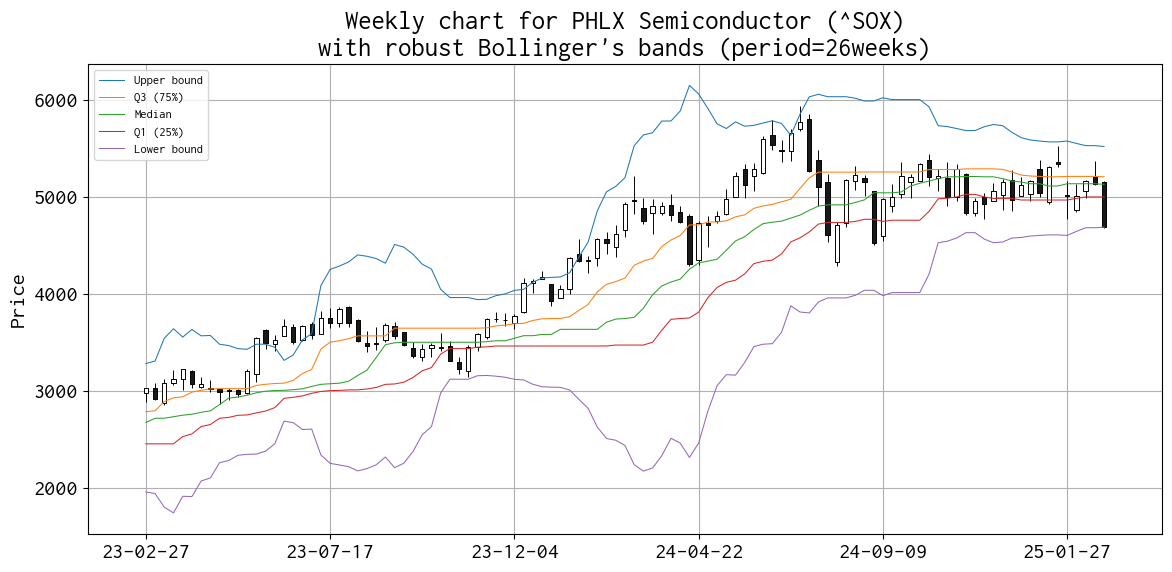

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=0.75, label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=0.75, label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=0.75, label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=0.75, label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=False,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00-05:00,5209.979980,5366.319824,5120.029785,5136.589844,0,0.0,0.0
2025-02-24 00:00:00-05:00,5155.370117,5167.439941,4684.775879,4686.753418,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00-05:00    5136.589844
2025-02-24 00:00:00-05:00    4686.753418
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00-05:00           NaN
2025-02-24 00:00:00-05:00   -449.836426
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00-05:00   -468.616699
dtype: float64

In [9]:
df['Close'].rolling(13).mean().tail()

Date
2025-01-27 00:00:00-05:00    5090.313852
2025-02-03 00:00:00-05:00    5068.684608
2025-02-10 00:00:00-05:00    5093.865385
2025-02-17 00:00:00-05:00    5107.772311
2025-02-24 00:00:00-05:00    5089.325646
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(26).mean().tail()

Date
2025-01-27 00:00:00-05:00    5082.035025
2025-02-03 00:00:00-05:00    5093.569242
2025-02-10 00:00:00-05:00    5093.211163
2025-02-17 00:00:00-05:00    5089.670391
2025-02-24 00:00:00-05:00    5071.513991
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00-05:00    5039.715755
2025-02-03 00:00:00-05:00    5048.216525
2025-02-10 00:00:00-05:00    5060.394597
2025-02-17 00:00:00-05:00    5070.424598
2025-02-24 00:00:00-05:00    5065.754855
Name: Close, dtype: float64

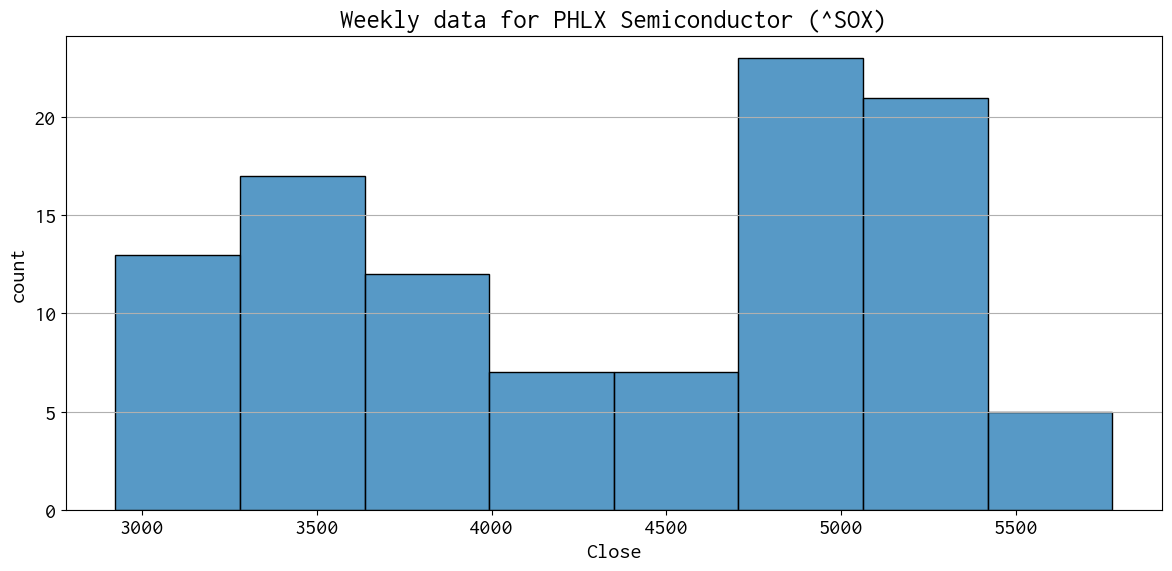

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

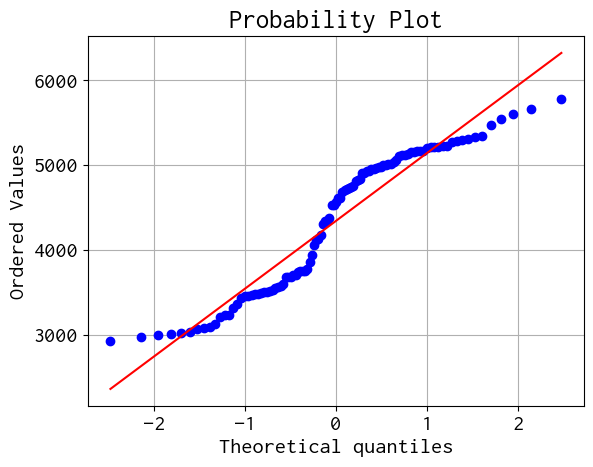

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9151273258724367, p-value: 4.903965789544234e-06
